## Reto 1: Boxplots

### 1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
### 2. Desarrollo:

#### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [1]:
# Tu código va aquí
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [30]:
mainpath = "https://raw.githubusercontent.com/EduHdzVillasana/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets"
df_nasa = pd.read_csv(os.path.join(mainpath,"near_earth_objects-jan_feb_1995-clean.csv"), index_col=0)
df_new_york = pd.read_json(os.path.join(mainpath,"new_york_times_bestsellers-clean.json"))
df_melbourne = pd.read_csv(os.path.join(mainpath,"melbourne_housing-clean.csv"), index_col=0)

In [8]:
def summary(data):
  minimo = data.min()
  Q1 = data.quantile(0.25)
  median = data.median()
  mean = data.mean()
  Q2 = data.quantile(0.5)
  Q3 = data.quantile(0.75)
  maximo = data.max()
  IQR = Q3 - Q1
  resumen = {'minimo': minimo, 'Q1': Q1, 'mediana':median,'Q2':Q2,'Q3':Q3,'max':maximo,'IQR':IQR, 'media':mean}
  return resumen

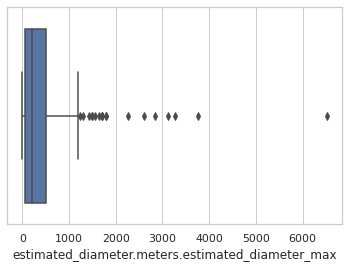

In [10]:
# NASA estimated_diameter.meters.estimated_diameter_max

sns.set(style="whitegrid")
sns.boxplot(x=df_nasa["estimated_diameter.meters.estimated_diameter_max"]);


In [23]:
a = summary(df_nasa["estimated_diameter.meters.estimated_diameter_max"])
IQR_nasa_1 = a["IQR"]
Q1_nasa_1 = a["Q1"]
Q3_nasa_1 = a["Q3"]
a

{'IQR': 455.41872486110003,
 'Q1': 62.2357573367,
 'Q2': 215.7943048444,
 'Q3': 517.6544821978,
 'max': 6516.883821679,
 'media': 410.0860422397653,
 'mediana': 215.7943048444,
 'minimo': 2.978790628}

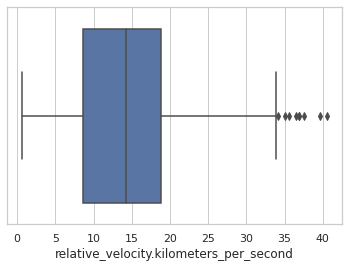

In [13]:
# NASA relative_velocity.kilometers_per_second

sns.set(style="whitegrid")
sns.boxplot(x=df_nasa["relative_velocity.kilometers_per_second"]);

In [24]:
a = summary(df_nasa["relative_velocity.kilometers_per_second"])
IQR_nasa_2 = a["IQR"]
Q1_nasa_2 = a["Q1"]
Q3_nasa_2 = a["Q3"]
a

{'IQR': 10.1831033325,
 'Q1': 8.599442511900001,
 'Q2': 14.257165835699999,
 'Q3': 18.7825458444,
 'max': 40.5274283635,
 'media': 14.98422791317087,
 'mediana': 14.257165835699999,
 'minimo': 0.681436673}

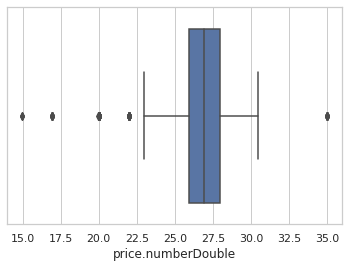

In [17]:
# New York price.numberDouble

sns.set(style="whitegrid")
sns.boxplot(x=df_new_york["price.numberDouble"]);

In [25]:
a = summary(df_new_york["price.numberDouble"])
IQR_new_york = a["IQR"]
Q1_new_york = a["Q1"]
Q3_new_york = a["Q3"]
a

{'IQR': 2.039999999999999,
 'Q1': 25.95,
 'Q2': 26.95,
 'Q3': 27.99,
 'max': 34.99,
 'media': 26.8183679525219,
 'mediana': 26.95,
 'minimo': 14.99}

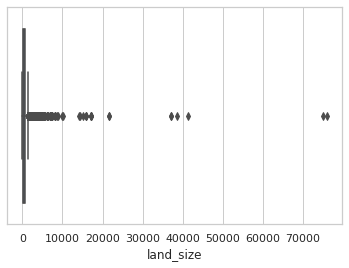

In [19]:
# Melborn land_size

sns.set(style="whitegrid")
sns.boxplot(x=df_melbourne["land_size"]);

In [26]:
a = summary(df_melbourne["land_size"])
IQR_melbourne = a["IQR"]
Q1_melbourne = a["Q1"]
Q3_melbourne = a["Q3"]
a

{'IQR': 494.0,
 'Q1': 162.0,
 'Q2': 412.0,
 'Q3': 656.0,
 'max': 76000.0,
 'media': 554.4580972007557,
 'mediana': 412.0,
 'minimo': 0.0}

#### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

In [31]:
# Tu código va aquí

df_nasa = df_nasa[(df_nasa["estimated_diameter.meters.estimated_diameter_max"] <= Q3_nasa_1 + IQR_nasa_1)
& (df_nasa["estimated_diameter.meters.estimated_diameter_max"] >= Q1_nasa_1 - IQR_nasa_1)]

In [32]:
df_nasa = df_nasa[(df_nasa["relative_velocity.kilometers_per_second"] <= Q3_nasa_2 + IQR_nasa_2)
& (df_nasa["relative_velocity.kilometers_per_second"] >= Q1_nasa_2 - IQR_nasa_2)]

In [33]:
df_new_york = df_new_york[(df_new_york["price.numberDouble"] <= Q3_new_york + IQR_new_york)
& (df_new_york["price.numberDouble"] >= Q1_new_york - IQR_new_york)]

In [34]:
df_melbourne = df_melbourne[(df_melbourne["land_size"] <= Q3_melbourne + IQR_melbourne)
& (df_melbourne["land_size"] >= Q1_melbourne - IQR_melbourne)]

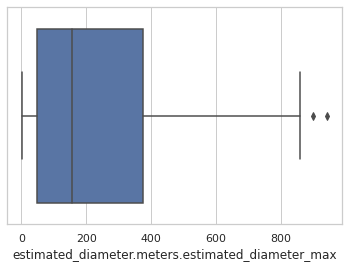

In [35]:
sns.set(style="whitegrid")
sns.boxplot(x=df_nasa["estimated_diameter.meters.estimated_diameter_max"]);

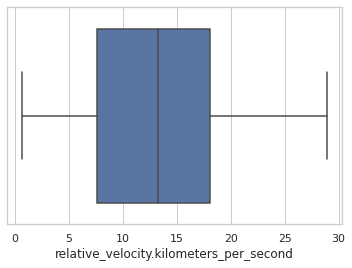

In [36]:
sns.set(style="whitegrid")
sns.boxplot(x=df_nasa["relative_velocity.kilometers_per_second"]);

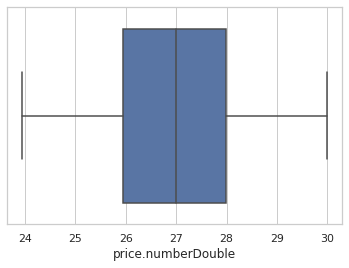

In [37]:
sns.set(style="whitegrid")
sns.boxplot(x=df_new_york["price.numberDouble"]);

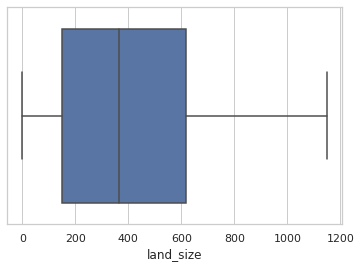

In [38]:
sns.set(style="whitegrid")
sns.boxplot(x=df_melbourne["land_size"]);